In [1]:
'''
This notebook analyzes the data from the paper by Horrocks et al.

Date: 29.04.2024
Author: Jonathan Gant
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load from excel files

In [ ]:
datadir = 'data/horrocks/'

fname = 'F1d_run.xls'
running_trials = pd.read_excel(datadir + fname, header=0).to_numpy()
fname = 'F1d_stat.xls'
stationary_trials = pd.read_excel(datadir + fname, header=0).to_numpy()

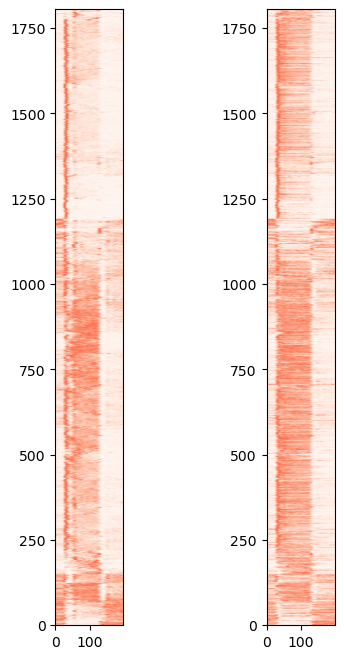

In [4]:
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=0, vmax=2)

fig, ax = plt.subplots(1, 2, figsize=(5, 8))

ax[0].imshow(stationary_trials, cmap='Reds', origin='lower', norm=norm)
ax[1].imshow(running_trials, cmap='Reds', origin='lower', norm=norm)

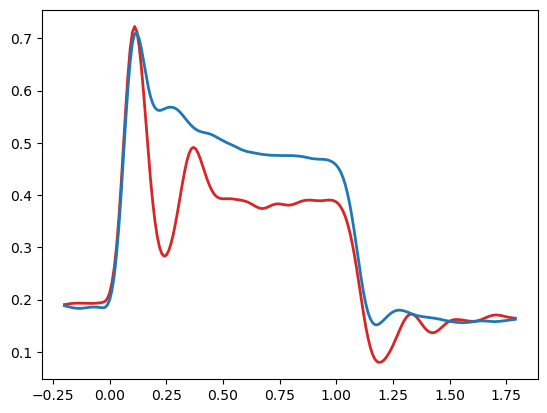

In [5]:
avg_running_fr = np.mean(running_trials, axis=0)
avg_stationary_fr = np.mean(stationary_trials, axis=0)
times = np.linspace(-.2, 1.8, len(avg_stationary_fr), endpoint=False)

plt.plot(times, avg_stationary_fr, color='tab:red', linewidth=2)
plt.plot(times, avg_running_fr, color='tab:blue', linewidth=2)
# plt.xlim(0, 1)

In [15]:
# make a new directory for individual responses
import os
if not os.path.exists('../../../Writings/locomotion_coding_manuscript/fig3/individual_responses/'):
    os.makedirs('../../../Writings/locomotion_coding_manuscript/fig3/individual_responses/', exist_ok=True)

for i in range(len(stationary_trials)):
    fig, ax = plt.subplots(figsize=(4, 3))
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.plot(times, stationary_trials[i, :], color='tab:gray', linewidth=0.5, alpha=0.5)
    ax.plot(times, running_trials[i, :], color='tab:orange', linewidth=0.5, alpha=0.5)
    ax.set_ylim(0, 1)
    ax.set_xlim(-.2, 1.8)
    ax.set_title(f'Neuron {i} Response')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Norm. firing rate')
    # create a gray square in the backgroun from 0 to 1 second
    ax.axvspan(0, 1, color='gray', alpha=0.2)
    plt.savefig(f'../../../Writings/locomotion_coding_manuscript/fig3/individual_responses/neuron_{i}_response.pdf', bbox_inches='tight', format='pdf')
    plt.close(fig)

In [8]:
times[20:120].shape

(100,)

In [9]:
# directly load the average
mean_running_fr = pd.read_excel(datadir + 'F1e_run.xls', header=None).to_numpy()[0, :]
mean_stationary_fr = pd.read_excel(datadir + 'F1e_stat.xls', header=None).to_numpy()[0, :]

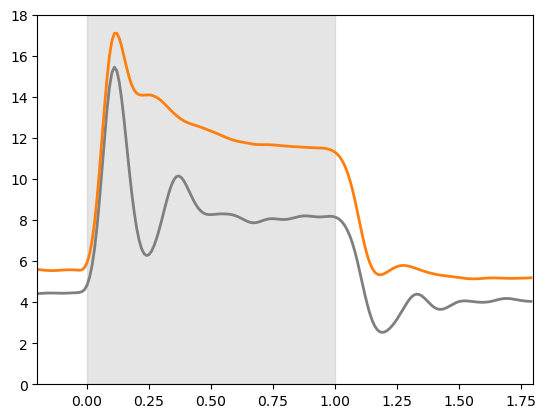

In [10]:
# plt.plot(np.linspace(0, .99, 100), mean_stationary_fr[25]:120], color='tab:red', linewidth=2)
# plt.plot(np.linspace(0, .99, 100), mean_running_fr[25]:120], color='tab:blue', linewidth=2)
plt.plot(times, mean_stationary_fr, color='tab:gray', linewidth=2)
plt.plot(times, mean_running_fr, color='tab:orange', linewidth=2)
plt.ylim(0, 18)
plt.xlim(-.2, 1.8)
# create a gray square in the backgroun from 0 to 1 second
plt.axvspan(0, 1, color='gray', alpha=0.2)
plt.savefig('../../../Writings/locomotion_coding_manuscript/fig3/population_avg_horrocks.pdf', bbox_inches='tight', format='pdf')

In [9]:
np.argmax(mean_stationary_fr)

np.int64(31)

In [10]:
np.argmax(mean_running_fr)

np.int64(32)

In [7]:
# compute the ACF of the avg running and stationary firing rates
from statsmodels.tsa.stattools import acf

n_lags = 99

demean_mean_stationary_fr = mean_stationary_fr - np.mean(mean_stationary_fr)
demean_mean_running_fr = mean_running_fr - np.mean(mean_running_fr)

stationary_acf = acf(demean_mean_stationary_fr, nlags=n_lags)
running_acf = acf(demean_mean_running_fr, nlags=n_lags)
plt.plot(np.arange(0, n_lags*10+10, 10), stationary_acf, color='tab:red', linewidth=2)
plt.plot(np.arange(0, n_lags*10+10, 10), running_acf, color='tab:blue', linewidth=2)
# plt.xlim(0, 250)

NameError: name 'mean_stationary_fr' is not defined

In [8]:
# commpute the fourier transform of the average firing rates
from scipy.fft import rfft, rfftfreq

N = len(mean_running_fr)
T = 0.01
yf = rfft(mean_running_fr)
xf = rfftfreq(N, T)
plt.plot(xf, np.abs(yf), color='tab:blue', linewidth=2)
yf = rfft(mean_stationary_fr)
xf = rfftfreq(N, T)
plt.plot(xf, np.abs(yf), color='tab:red', linewidth=2)
plt.yscale('log')

NameError: name 'mean_running_fr' is not defined

In [9]:
np.linspace(-.2, 1.79, np.shape(stationary_trials)[1])[20:120].shape

(100,)

In [10]:
from scipy.stats import mode
running_peak_idx = np.argmax(running_trials, axis=1)
stationary_peak_idx = np.argmax(stationary_trials, axis=1)

mode_peak_idx = mode(np.concatenate([running_peak_idx, stationary_peak_idx]))[0]

In [11]:
stationary_trials.shape

(1806, 200)

In [12]:
# compute the ACF and fourier spectrum for each trial
import scipy.signal as signal
n_lags = 49
start_idx = 0
end_idx = 200

stationary_trials_subset = stationary_trials[:, start_idx:end_idx]
running_trials_subset = running_trials[:, start_idx:end_idx]
stationary_trials_subset -= np.mean(stationary_trials_subset, axis=1, keepdims=True)
running_trials_subset -= np.mean(running_trials_subset, axis=1, keepdims=True)

stationary_acf_all = np.zeros((len(stationary_trials), n_lags+1))
running_acf_all = np.zeros((len(running_trials), n_lags+1))
stationary_spectra_all = np.zeros((len(stationary_trials), (end_idx - start_idx)//2 + 1))
running_spectra_all = np.zeros((len(running_trials), (end_idx - start_idx)//2 + 1))
for i in range(len(stationary_trials)):
    stationary_acf_all[i, :] = acf(stationary_trials_subset[i, :], nlags=n_lags)
    running_acf_all[i, :] = acf(running_trials_subset[i, :], nlags=n_lags)
    stationary_spectra_all[i, :] = np.abs(np.fft.rfft(stationary_trials_subset[i, :]))**2
    running_spectra_all[i, :] = np.abs(np.fft.rfft(running_trials_subset[i, :]))**2


In [13]:
# compute the frequency
freqs = np.fft.rfftfreq(np.shape(running_trials[:, start_idx:end_idx])[1], 1/100)

In [14]:
np.arange(0, 2000, 10)[20:120].shape

(100,)

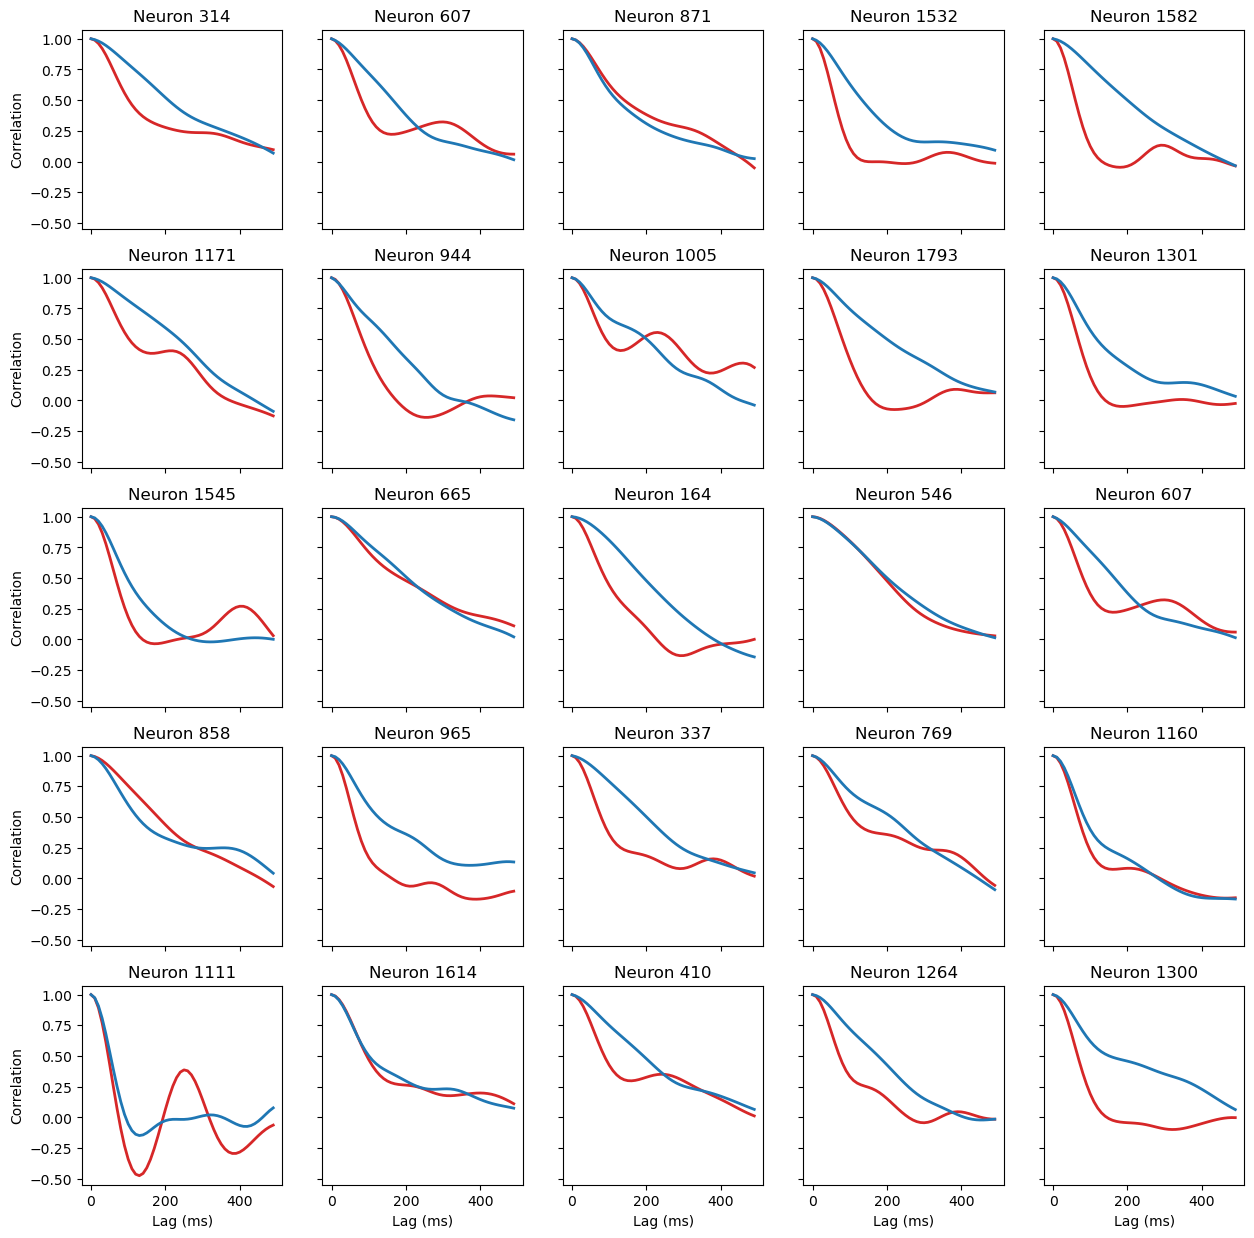

In [15]:
# randomly plot 25 trials in a 5 by 5 grid
fig, ax = plt.subplots(5, 5, figsize=(15, 15), sharex=True, sharey=True)
for i in range(5):
    for j in range(5):
        idx = np.random.randint(0, len(stationary_trials))
        ax[i, j].plot(np.arange(0, 500, 10), stationary_acf_all[idx, :], color='tab:red', linewidth=2)
        ax[i, j].plot(np.arange(0, 500, 10), running_acf_all[idx, :], color='tab:blue', linewidth=2)
        ax[i, j].set_title(f'Neuron {idx}')
        if i == 4:
            ax[i, j].set_xlabel('Lag (ms)')
        if j == 0:
            ax[i, j].set_ylabel('Correlation')

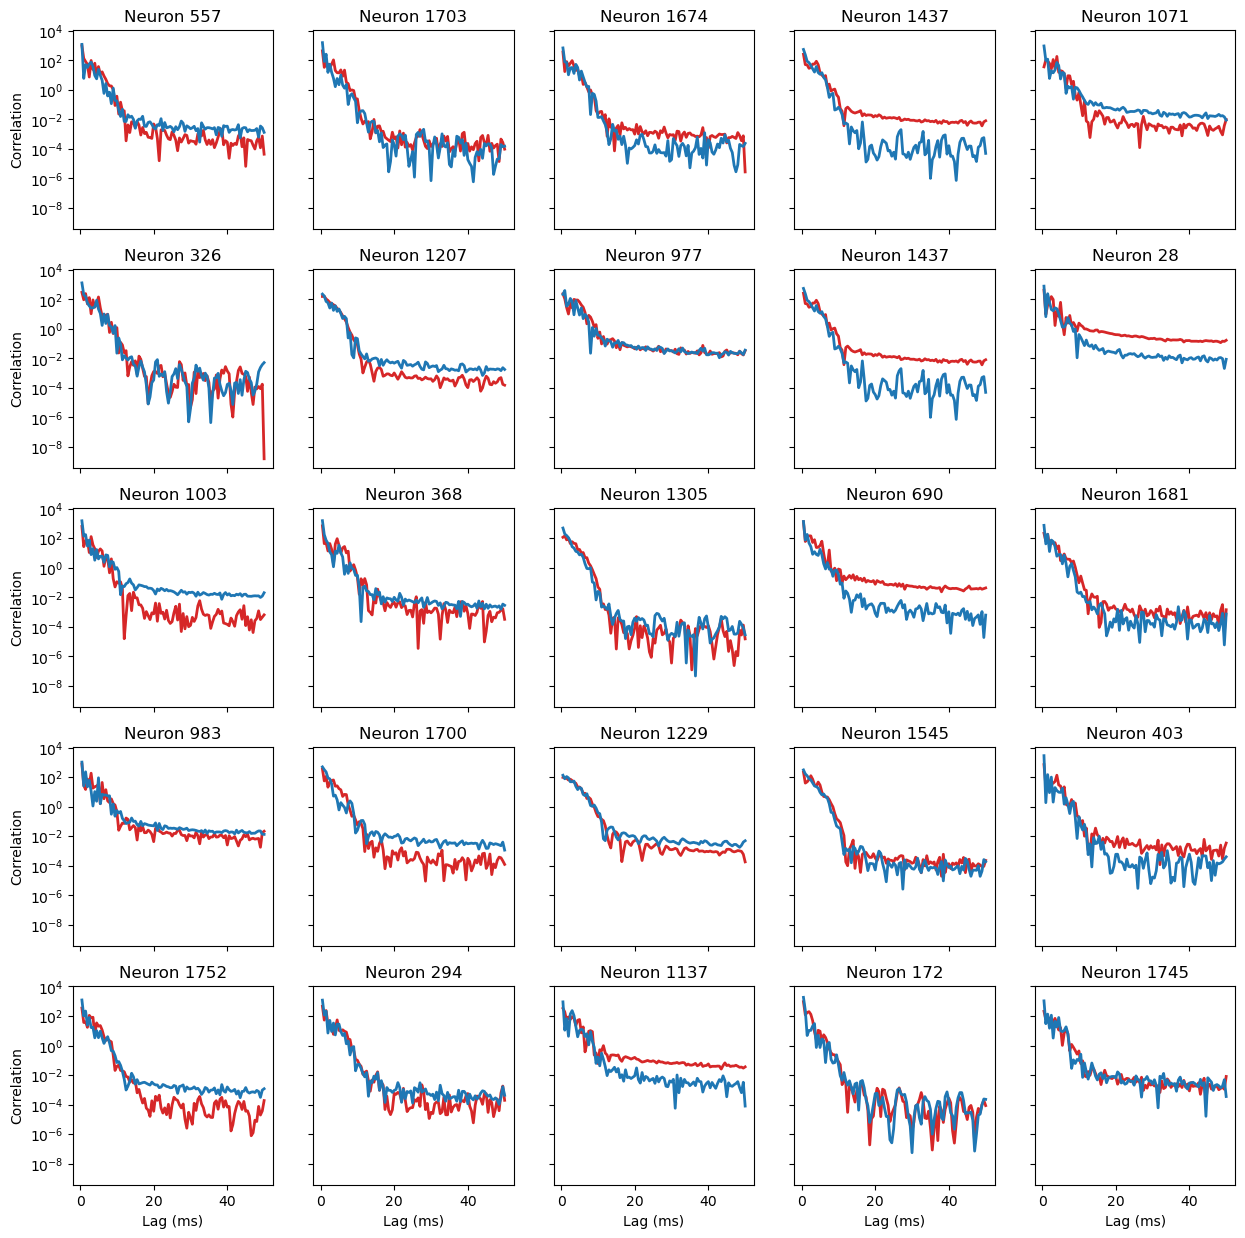

In [21]:
# randomly plot 25 trials in a 5 by 5 grid
fig, ax = plt.subplots(5, 5, figsize=(15, 15), sharex=True, sharey=True)
for i in range(5):
    for j in range(5):
        idx = np.random.randint(0, len(stationary_trials))
        ax[i, j].plot(freqs[1:], stationary_spectra_all[idx, 1:], color='tab:red', linewidth=2)
        ax[i, j].plot(freqs[1:], running_spectra_all[idx, 1:], color='tab:blue', linewidth=2)
        ax[i, j].set_title(f'Neuron {idx}')
        ax[i, j].set_yscale('log')
        if i == 4:
            ax[i, j].set_xlabel('Lag (ms)')
        if j == 0:
            ax[i, j].set_ylabel('Correlation')

In [16]:
# make a directory to save the figures
import os
dir_name = '../../../Writings/locomotion_coding_manuscript/fig3/horrocks_acf'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

In [29]:
# save all individual ACFs
for i in range(len(stationary_trials)):
        fig, ax = plt.subplots(1, 1, figsize=(4, 3))
        ax.plot(np.arange(0, 500, 10), stationary_acf_all[i, :], color='tab:gray', linewidth=1)
        ax.plot(np.arange(0, 500, 10), running_acf_all[i, :], color='tab:orange', linewidth=1)
        ax.set_ylim(-1, 1)
        ax.set_title(f'Neuron {i}')
        ax.set_xlabel('Lag (ms)')
        ax.set_ylabel('Correlation')
        ax.axhline(0, color='k', linestyle=':')
        plt.savefig(f'{dir_name}/acf_neuron_{i})_start_{start_idx}_end_{end_idx}.pdf', bbox_inches='tight', format='pdf')
        plt.close(fig)

NameError: name 'dir_name' is not defined

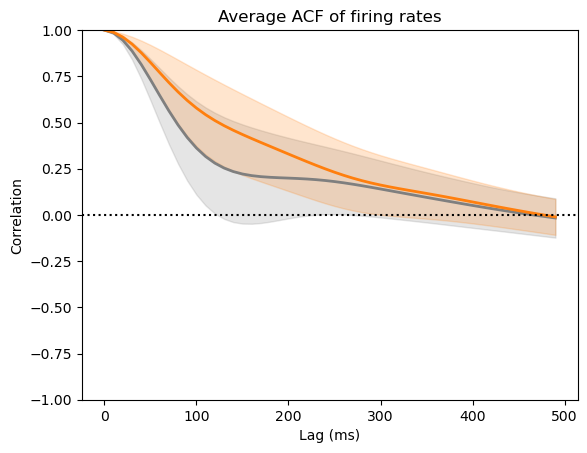

In [16]:
# plot the average ACF and use fill between to show the std
from scipy.stats import sem

plt.plot(np.arange(0, 500, 10), np.mean(stationary_acf_all, axis=0), color='tab:gray', linewidth=2)
plt.fill_between(np.arange(0, 500, 10), np.mean(stationary_acf_all, axis=0) - np.std(stationary_acf_all, axis=0), np.mean(stationary_acf_all, axis=0) + np.std(stationary_acf_all, axis=0), color='tab:gray', alpha=0.2)
plt.plot(np.arange(0, 500, 10), np.mean(running_acf_all, axis=0), color='tab:orange', linewidth=2)
plt.fill_between(np.arange(0, 500, 10), np.mean(running_acf_all, axis=0) - np.std(running_acf_all, axis=0), np.mean(running_acf_all, axis=0) + np.std(running_acf_all, axis=0), color='tab:orange', alpha=0.2)
plt.ylabel('Correlation')
plt.xlabel('Lag (ms)')
plt.axhline(0, color='k', linestyle=':')
# plt.xlim(0, 500)
plt.ylim(-1, 1)
plt.title('Average ACF of firing rates')
# plt.xlim(0, 500)
plt.savefig(f'{dir_name}/average_acf_start_{start_idx}_end_{end_idx}.pdf', bbox_inches='tight', format='pdf')

In [17]:
# find which neurons are most similar to the average ACF
avg_acf_stationary = np.mean(stationary_acf_all, axis=0)
distances_stationary = np.sum(np.abs(stationary_acf_all - avg_acf_stationary.reshape(1, -1)), axis=-1).flatten()
avg_acf_running = np.mean(running_acf_all, axis=0)
distances_running = np.sum(np.abs(running_acf_all - avg_acf_running.reshape(1, -1)), axis=-1).flatten()

# find the 10 most similar neurons to the average ACF
similarity_score = distances_stationary + distances_running
most_similar_neurons = np.argsort(similarity_score)[-20:]

print(most_similar_neurons)

[1342 1245 1072 1322 1404   77  917  141 1070 1363 1111 1334 1353   78
  939 1362  138  273 1056  136]


In [ ]:
# save all individual ACFs
for i in most_similar_neurons:
        fig, ax = plt.subplots(1, 1, figsize=(4, 3))
        ax.plot(np.arange(0, 500, 10), stationary_acf_all[i, :], color='tab:gray', linewidth=1)
        ax.plot(np.arange(0, 500, 10), running_acf_all[i, :], color='tab:orange', linewidth=1)
        ax.set_ylim(-1, 1)
        ax.set_title(f'Neuron {i}')
        ax.set_xlabel('Lag (ms)')
        ax.set_ylabel('Correlation')
        ax.axhline(0, color='k', linestyle=':')
        plt.show()
        # plt.savefig(f'{dir_name}/acf_neuron_{i})_start_{start_idx}_end_{end_idx}.pdf', bbox_inches='tight', format='pdf')
        plt.close(fig)

In [19]:
# for each trial interpolate to find at what lag in ms the correlation first drops below a cutoff value

cutoff_corr = [0.5]

def find_cutoff_lag(acf, cutoff_corr):
    """
    Find the lag at which the ACF first drops below a cutoff value.
    """
    for i in range(len(acf)):
        if acf[i] < cutoff_corr:
            return np.arange(0, 500, 10)[i]
    return np.arange(0, 500, 10)[-1]


# find the cutoff lag for each trial
stationary_cutoff_lags = np.zeros((len(cutoff_corr), len(stationary_trials)))
running_cutoff_lags = np.zeros((len(cutoff_corr), len(running_trials)))
for j in range(len(cutoff_corr)):
    for i in range(len(stationary_trials)):
        stationary_cutoff_lags[j, i] = find_cutoff_lag(stationary_acf_all[i, :], cutoff_corr[j])
        running_cutoff_lags[j, i] = find_cutoff_lag(running_acf_all[i, :], cutoff_corr[j])

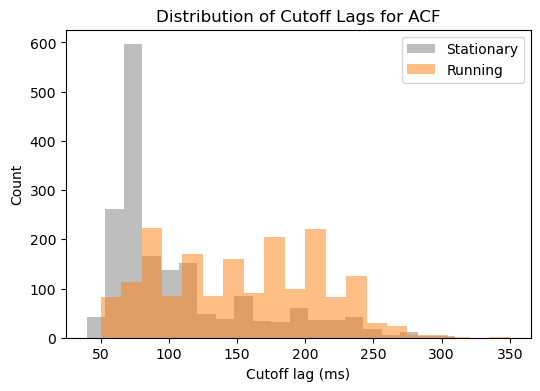

In [20]:
# plot the two distributions of cutoff lags
plt.figure(figsize=(6, 4))
plt.hist(stationary_cutoff_lags[0, :], bins=20, alpha=0.5, label='Stationary', color='tab:gray')
plt.hist(running_cutoff_lags[0, :], bins=20, alpha=0.5, label='Running', color='tab:orange')
plt.xlabel('Cutoff lag (ms)')
plt.ylabel('Count')
plt.title('Distribution of Cutoff Lags for ACF')
plt.legend()

Fraction of neurons with larger cutoff lags in running than in stationary: 0.75


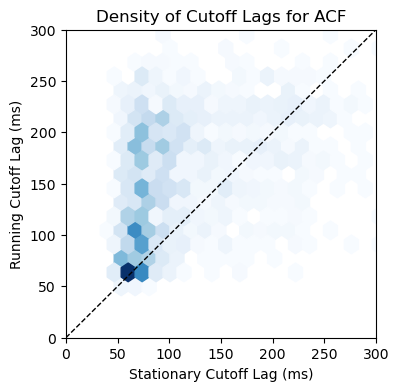

In [32]:
# make a density scatter plot of the cutoff lags
plt.figure(figsize=(4, 4))
plt.hexbin(stationary_cutoff_lags[0, :], running_cutoff_lags[0, :], gridsize=20, cmap='Blues', mincnt=1)
plt.xlabel('Stationary Cutoff Lag (ms)')
plt.ylabel('Running Cutoff Lag (ms)')
plt.title('Density of Cutoff Lags for ACF')
# plt.colorbar(label='Count')
plt.xlim(0, 300)
plt.ylim(0, 300)
# add a diagonal line
plt.plot([0, 300], [0, 300], color='k', linestyle='--', linewidth=1)
# print the fraction of neurons with larger cutoff lags in running than in stationary
fraction_larger_running = np.sum(running_cutoff_lags[0, :] > stationary_cutoff_lags[0, :]) / len(stationary_trials)
print(f'Fraction of neurons with larger cutoff lags in running than in stationary: {fraction_larger_running:.2f}')

In [22]:
# do a t-test on the running and stationary cutoff lag for the whole population return a single p-value
from scipy.stats import ttest_rel
p_values = []
for j in range(len(cutoff_corr)):
    t_stat, p_val = ttest_rel(stationary_cutoff_lags[j, :], running_cutoff_lags[j, :])
    p_values.append(p_val)
# print the p-values
print("P-values for cutoff lags:", p_values)
print('t-statistic:', t_stat)

P-values for cutoff lags: [np.float64(4.643682016853339e-172)]
t-statistic: -31.28783927405298


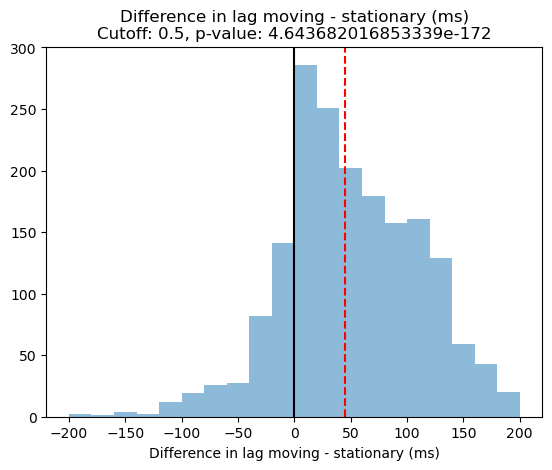

In [ ]:
diff_lags = running_cutoff_lags - stationary_cutoff_lags
cutoff_idx = 0
bins = np.linspace(-200, 200, 21)
plt.hist(diff_lags[cutoff_idx, :].flatten(), bins=bins, color='tab:blue', alpha=0.5)
plt.xlabel('Difference in lag moving - stationary (ms)')
plt.axvline(np.mean(diff_lags[cutoff_idx, :]), color='red', linestyle='--', label='Mean')
plt.axvline(0, color='k', linestyle='-', label='Zero')
# have the pval in the title
plt.title(f'Difference in lag moving - stationary (ms)\nCutoff: {cutoff_corr[cutoff_idx]}, p-value: {p_values[cutoff_idx]}')
plt.savefig(f'{dir_name}/diff_lags_hist_data_start_{start_idx}_end_{end_idx}.pdf', bbox_inches='tight', format='pdf')

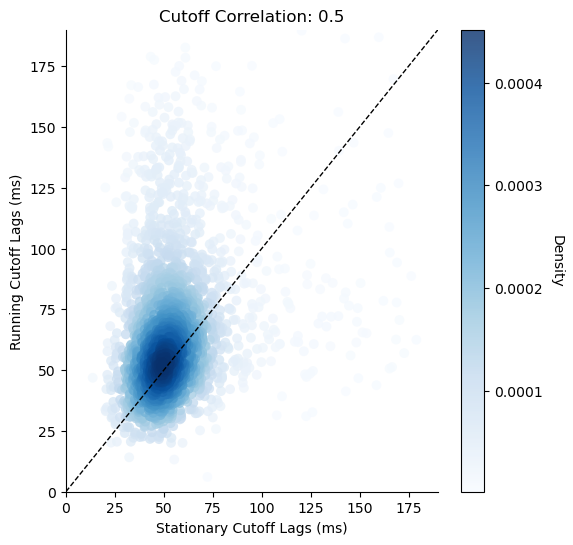

Cutoff correlation: 0.5
Fraction where stationary cutoff lag is less than running cutoff lag: 0.5481727574750831
Cutoff correlation: 0.6
Fraction where stationary cutoff lag is less than running cutoff lag: 0.5110741971207088
Cutoff correlation: 0.7
Fraction where stationary cutoff lag is less than running cutoff lag: 0.4689922480620155


In [148]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Create a figure with three subplots
fig, ax = plt.subplots(1, 1, figsize=(4*1.5, 4*1.5))

# Ensure the x and y axes span the same range
min_val = 0
max_val = max(np.max(stationary_cutoff_lags), np.max(running_cutoff_lags)) + 10

j = 0
# Add small jitter to the data for better visualization

jitter_strength = 10  # Adjust the jitter strength as needed
stationary_cutoff_lags_jittered = stationary_cutoff_lags[j, :] + np.random.uniform(-jitter_strength, jitter_strength, len(stationary_cutoff_lags[j, :]))
running_cutoff_lags_jittered = running_cutoff_lags[j, :] + np.random.uniform(-jitter_strength, jitter_strength, len(running_cutoff_lags[j, :]))

# Compute the point density using Gaussian KDE
xy = np.vstack([stationary_cutoff_lags_jittered, running_cutoff_lags_jittered])
# xy = np.vstack([stationary_cutoff_lags[j, :], running_cutoff_lags[j, :]])
density = gaussian_kde(xy)(xy)

# Sort the points by density so that high-density points are plotted on top
idx = density.argsort()
stationary_sorted = stationary_cutoff_lags_jittered[idx]
running_sorted = running_cutoff_lags_jittered[idx]
density_sorted = density[idx]

# Create the scatter plot
scatter = ax.scatter(
    stationary_sorted, running_sorted, c=density_sorted, cmap='Blues', s=50, edgecolor='None', alpha=0.8
)

# Add labels, title, and grid
ax.set_title(f'Cutoff Correlation: {cutoff_corr[j]}')
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
# also plot a diagonal dashed line
ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)
# remove top and right splines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Stationary Cutoff Lags (ms)')
ax.set_ylabel('Running Cutoff Lags (ms)')
# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Density', rotation=270, labelpad=15)
plt.savefig(f'{dir_name}/cutoff_lags_{cutoff_corr[j]}_density_scatter.pdf', bbox_inches='tight', format='pdf')
# Adjust layout and show the plot
plt.show()
# print the fraction where the stationary cutoff lag is less than the running cutoff lag
for j in range(len(cutoff_corr)):
    print(f'Cutoff correlation: {cutoff_corr[j]}')
    print(f'Fraction where stationary cutoff lag is less than running cutoff lag: {np.sum(stationary_cutoff_lags[j, :] < running_cutoff_lags[j, :]) / len(stationary_cutoff_lags[j, :])}')

Cutoff correlation: 0.5
Fraction where stationary cutoff lag is less than running cutoff lag: 0.5481727574750831
Cutoff correlation: 0.6
Fraction where stationary cutoff lag is less than running cutoff lag: 0.5110741971207088
Cutoff correlation: 0.7
Fraction where stationary cutoff lag is less than running cutoff lag: 0.4689922480620155


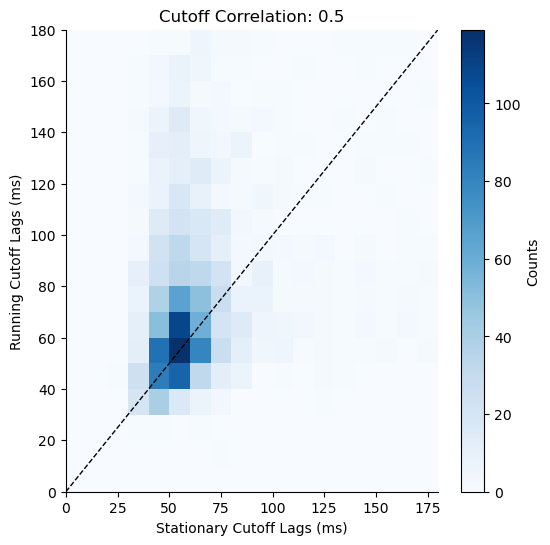

In [149]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Create a figure with three subplots
fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # 1 row, 3 columns

j = 0

# Ensure the x and y axes span the same range
min_val = 0
max_val = max(np.max(stationary_cutoff_lags[j, :]), np.max(running_cutoff_lags[j, :]))
bins = np.arange(0, max_val+10, 10)

# Create the scatter plot
scatter = ax.hist2d(stationary_cutoff_lags[j, :], running_cutoff_lags[j, :], cmap='Blues', bins=[bins, bins])

# Add labels, title, and grid
ax.set_title(f'Cutoff Correlation: {cutoff_corr[j]}')
ax.set_xlim(min_val, max_val)
ax.set_ylim(min_val, max_val)
# also plot a diagonal dashed line
ax.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1)
# remove top and right splines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Stationary Cutoff Lags (ms)')
ax.set_ylabel('Running Cutoff Lags (ms)')
# Adjust layout and show the plot
# print the fraction where the stationary cutoff lag is less than the running cutoff lag
for j in range(len(cutoff_corr)):
    print(f'Cutoff correlation: {cutoff_corr[j]}')
    print(f'Fraction where stationary cutoff lag is less than running cutoff lag: {np.sum(stationary_cutoff_lags[j, :] < running_cutoff_lags[j, :]) / len(stationary_cutoff_lags[j, :])}')
cbar = fig.colorbar(scatter[3], ax=ax, label='Counts', orientation='vertical')
plt.savefig(f'{dir_name}/cutoff_lags_histogram.pdf', bbox_inches='tight', format='pdf')


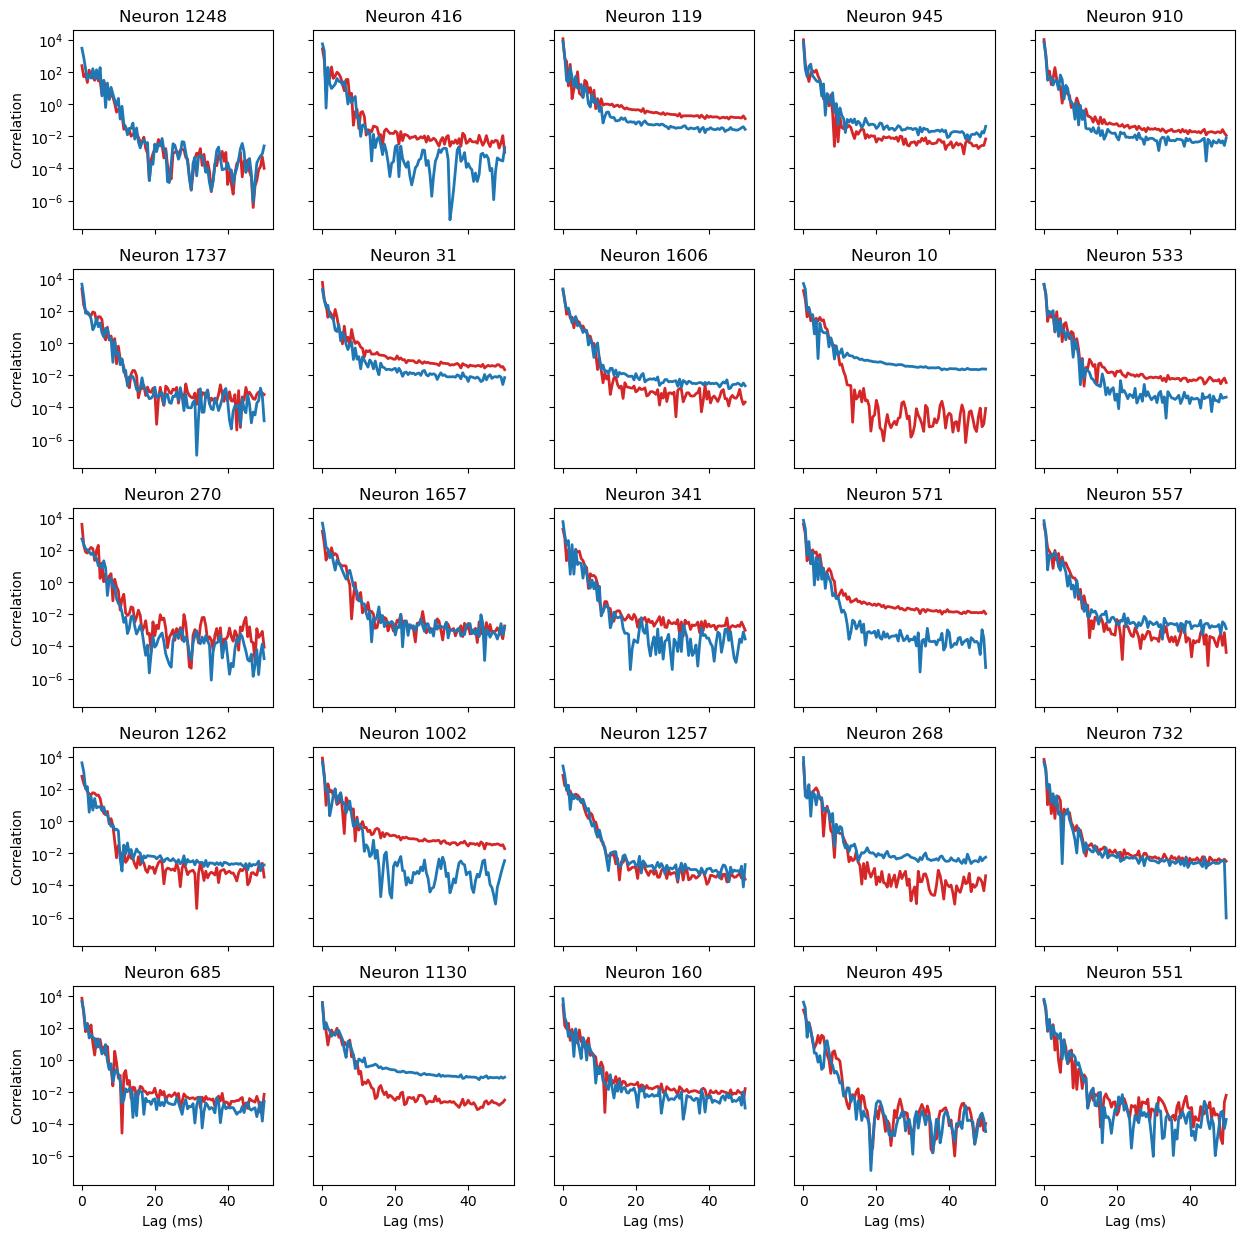

In [51]:
# randomly plot 25 trials in a 5 by 5 grid
fig, ax = plt.subplots(5, 5, figsize=(15, 15), sharex=True, sharey=True)
for i in range(5):
    for j in range(5):
        idx = np.random.randint(0, len(stationary_trials))
        ax[i, j].plot(freqs, stationary_spectra_all[idx, :], color='tab:red', linewidth=2)
        ax[i, j].plot(freqs, running_spectra_all[idx, :], color='tab:blue', linewidth=2)
        ax[i, j].set_yscale('log')
        ax[i, j].set_title(f'Neuron {idx}')
        if i == 4:
            ax[i, j].set_xlabel('Lag (ms)')
        if j == 0:
            ax[i, j].set_ylabel('Correlation')

(0.0, 10.0)

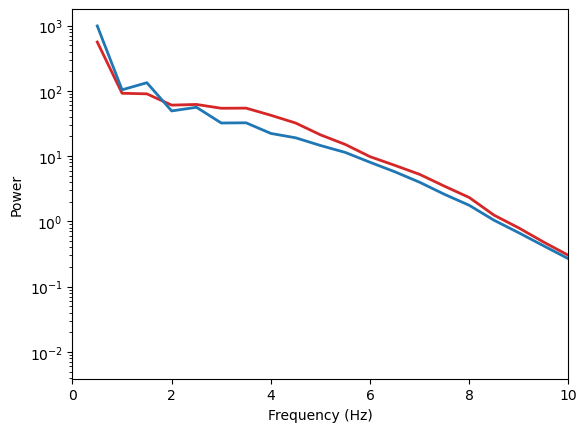

In [28]:
# plot the average spectrum and use fill between to show the std
plt.plot(freqs[1:], np.mean(stationary_spectra_all, axis=0)[1:], color='tab:red', linewidth=2)
# plt.fill_between(freqs, np.mean(stationary_spectra_all, axis=0) - np.std(stationary_spectra_all, axis=0), np.mean(stationary_spectra_all, axis=0) + np.std(stationary_spectra_all, axis=0), color='tab:red', alpha=0.2)
plt.plot(freqs[1:], np.mean(running_spectra_all, axis=0)[1:], color='tab:blue', linewidth=2)
# plt.fill_between(freqs, np.mean(running_spectra_all, axis=0) - np.std(running_spectra_all, axis=0), np.mean(running_spectra_all, axis=0) + np.std(running_spectra_all, axis=0), color='tab:blue', alpha=0.2)
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.yscale('log')
plt.xlim(0, 10)

In [29]:
# compute the centroid of the spectrum
def compute_centroid(spectrum, freqs):
    """
    Compute the centroid of a spectrum.
    """
    return np.sum(spectrum * freqs) / np.sum(spectrum)

print(compute_centroid(np.mean(stationary_spectra_all, axis=0)[1:100], freqs[1:100]))
print(compute_centroid(np.mean(running_spectra_all, axis=0)[1:100], freqs[1:100]))

1.6914078021011822
1.181712829723163
